In [1]:
from pipeline import *
from Module import *
from Loss import *

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


from numba import jit
from sklearn.preprocessing import OneHotEncoder 
from sklearn.metrics import zero_one_loss
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler
from mltools import *

In [2]:
datax, datay = gen_arti(epsilon=0.1,data_type=0)
datay = datay.reshape(-1, 1)

In [3]:
lin1 = Linear(2, 1)

ae = Sequentiel(lin1,
                )

n_iter = 300
ep = 1e-5
sq, loss = mini_SGD(ae, datax, datay, eps=ep, loss_fonction=MSELoss(), nb_iteration=n_iter)

iteration 0 loss = 118.68503011451546
iteration 20 loss = 27.071051089957848
iteration 40 loss = 9.72518816200888
iteration 60 loss = 6.281300080057896
iteration 80 loss = 5.507964246781108
iteration 100 loss = 5.496066496176193
iteration 120 loss = 5.733862115720363
iteration 140 loss = 5.395169393581555
iteration 160 loss = 5.856630985448257
iteration 180 loss = 5.335478284542549
iteration 200 loss = 5.855132962736322
iteration 220 loss = 5.524733243550884
iteration 240 loss = 5.527847126821925
iteration 260 loss = 5.757185971986836
iteration 280 loss = 5.171153484058961


In [4]:
ae

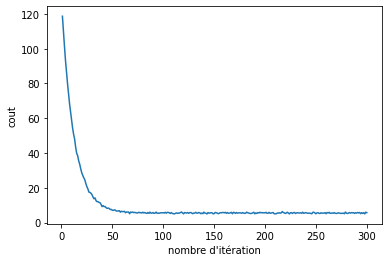

In [6]:
plt.figure()
plt.xlabel("nombre d'itération")
plt.ylabel('cout')
plt.plot(range(1,n_iter+1),loss)
#plt.savefig("img_rapport/cout_lin.png")
plt.show()

In [10]:
yhat =  np.where(sq.forward(datax)[-1]>0, 1, -1)

In [11]:
np.mean(yhat == datay)

0.999

In [9]:
def predict(datax):
    return np.where(sq.forward(datax)[-1]>0, 1, -1)


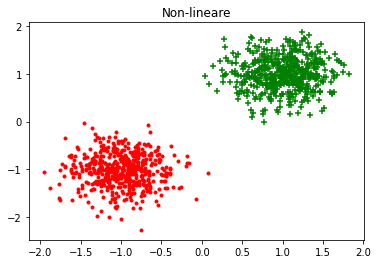

In [10]:
plt.figure()
plt.title('Non-lineare')
plot_data(datax,datay.reshape(-1))
plt.savefig("img_rapport/lin.png")
plt.show()

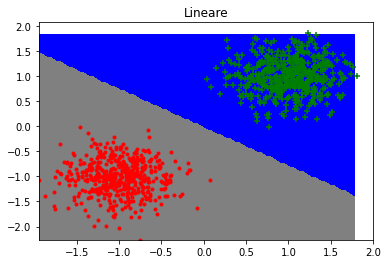

In [11]:
plt.figure()
plt.title('Lineare')
plot_frontiere(datax,lambda x : predict(x),step=100)
plot_data(datax,datay.reshape(-1))
plt.savefig("img_rapport/resultat_lin.png")
plt.show()

In [12]:
def proj_biais(datax):
    return np.hstack((np.ones(datax.shape[0]).reshape(-1,1),datax))


In [13]:
datax, datay = gen_arti(epsilon=0.1,data_type=1)
datay = datay.reshape(-1,1)
datay_01 = (datay+1)/2
datay_01.shape

(1000, 1)

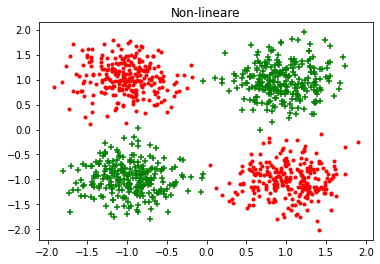

In [14]:
plt.figure()
plt.title('Non-lineare')
plot_data(datax,datay.reshape(-1))
plt.savefig("img_rapport/notlin")
plt.show()

In [15]:
datax_biais = proj_biais(datax)

In [40]:
lin1 = Linear(3, 10)
lin2 = Linear(10, 1)
ae = Sequentiel(lin1,
                TanH(),
                lin2,
                Sigmoid()
                )
n_iter = 1000
ep = 1e-4
sq, loss = mini_SGD(ae, datax_biais, datay_01, batch_size=1, eps=ep, loss_fonction=MSELoss(), nb_iteration=n_iter)

iteration 0 loss = 0.9062852374797572
iteration 20 loss = 0.22345671720630203
iteration 40 loss = 0.08369272221438423
iteration 60 loss = 0.12966038592446016
iteration 80 loss = 0.7633978748971495
iteration 100 loss = 0.5238641242576648
iteration 120 loss = 0.2922598514893439
iteration 140 loss = 0.09943506310250799
iteration 160 loss = 0.119568042701447
iteration 180 loss = 0.09716587485481835
iteration 200 loss = 0.12190419988195755
iteration 220 loss = 0.03813706802634586
iteration 240 loss = 0.043860303790424965
iteration 260 loss = 0.09233245351690787
iteration 280 loss = 0.017058339620600757
iteration 300 loss = 0.1231883183623524
iteration 320 loss = 0.04948202928365117
iteration 340 loss = 0.06684068743106836
iteration 360 loss = 0.026877732206201644
iteration 380 loss = 0.01666505893532954
iteration 400 loss = 0.010009848295111888
iteration 420 loss = 0.012218745194138875
iteration 440 loss = 0.014819038681120876
iteration 460 loss = 0.04598364704370697
iteration 480 loss = 0.

In [17]:
def predict(datax):
    datax_b = proj_biais(datax)
    #return np.where(Sigmoid().forward(ae.forward(datax)[-1])>0.5, 1, -1)
    return np.where(ae.forward(datax_b)[-1]>0.5, 1, -1)

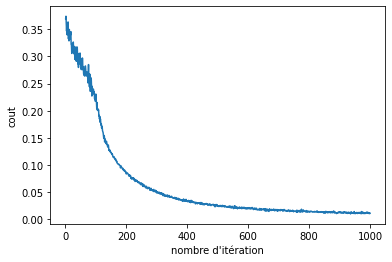

In [41]:
plt.figure()
plt.plot(range(1,n_iter+1),loss)
plt.xlabel("nombre d'itération")
plt.ylabel('cout')
plt.savefig("img_rapport/cout_nolin")
plt.show()

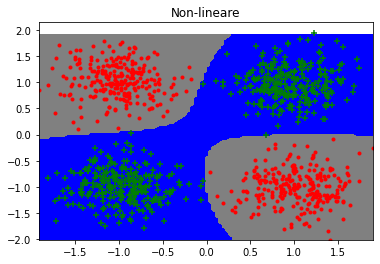

In [42]:
plt.figure()
plt.title('Non-lineare') 
plot_frontiere(datax,lambda x : predict(x),step=100)
plot_data(datax,datay.reshape(-1))
plt.savefig("img_rapport/resultat_nolin")
plt.show()

In [43]:
yhat = predict(datax)
np.mean(yhat == datay)

0.999

In [47]:
lin1 = Linear(3, 10)
lin2 = Linear(10, 1)
ae = Sequentiel(lin1,
                TanH(),
                lin2,
                Sigmoid()
                )
n_iter = 1000
ep = 1e-4
sq, loss = mini_SGD(ae, datax_biais, datay_01, batch_size=1000, eps=ep, loss_fonction=MSELoss(), nb_iteration=n_iter)

iteration 0 loss = 322.1379874903796
iteration 20 loss = 252.40681440775933
iteration 40 loss = 225.6514319332371
iteration 60 loss = 199.90322569482433
iteration 80 loss = 172.36032642041354
iteration 100 loss = 156.47311782686853
iteration 120 loss = 141.42537600061337
iteration 140 loss = 126.67137634997606
iteration 160 loss = 114.226839502225
iteration 180 loss = 102.11794659060982
iteration 200 loss = 95.13081396788056
iteration 220 loss = 84.82367240177578
iteration 240 loss = 77.97105658680076
iteration 260 loss = 71.30250217838687
iteration 280 loss = 68.64389557178518
iteration 300 loss = 60.82218161799752
iteration 320 loss = 56.477602808372374
iteration 340 loss = 51.14353804184408
iteration 360 loss = 49.54042939284924
iteration 380 loss = 44.50424481879975
iteration 400 loss = 43.61738587893002
iteration 420 loss = 40.69185288182282
iteration 440 loss = 37.26046638826815
iteration 460 loss = 34.149728877036424
iteration 480 loss = 31.5255253400119
iteration 500 loss = 30.

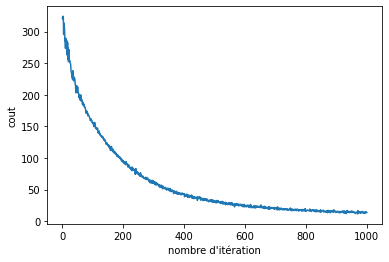

In [48]:
plt.figure()
plt.plot(range(1,n_iter+1),loss)
plt.xlabel("nombre d'itération")
plt.ylabel('cout')
plt.savefig("img_rapport/cout_stocha_nolin")
plt.show()

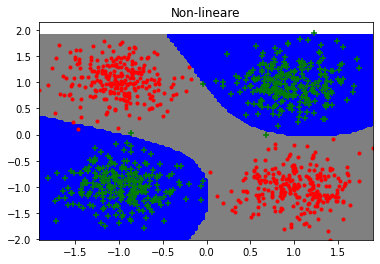

In [49]:
plt.figure()
plt.title('Non-lineare') 
plot_frontiere(datax,lambda x : predict(x),step=100)
plot_data(datax,datay.reshape(-1))
plt.savefig("img_rapport/stocha_nolin")
plt.show()

In [50]:
yhat = predict(datax)
np.mean(yhat == datay)

0.996

In [57]:
lin1 = Linear(3, 10)
lin2 = Linear(10, 1)
ae = Sequentiel(lin1,
                TanH(),
                lin2,
                Sigmoid()
                )
n_iter = 1000
ep = 1e-4
sq, loss = mini_SGD(ae, datax_biais, datay_01, batch_size = 100, eps=ep, loss_fonction=MSELoss(), nb_iteration=n_iter)

iteration 0 loss = 39.473648130053185
iteration 20 loss = 27.850530595512254
iteration 40 loss = 25.825124322184706
iteration 60 loss = 23.308184391036953
iteration 80 loss = 23.861371035221815
iteration 100 loss = 24.310841864388962
iteration 120 loss = 22.115055018611056
iteration 140 loss = 20.399979283455266
iteration 160 loss = 20.3799064599083
iteration 180 loss = 18.67893256669864
iteration 200 loss = 16.940517899849382
iteration 220 loss = 15.176639358997855
iteration 240 loss = 13.892807623081817
iteration 260 loss = 13.471366557267066
iteration 280 loss = 12.016138549051885
iteration 300 loss = 10.744950797339467
iteration 320 loss = 10.09968609061678
iteration 340 loss = 9.651895028376117
iteration 360 loss = 8.024462823638283
iteration 380 loss = 7.0288842596411625
iteration 400 loss = 7.384595801903571
iteration 420 loss = 6.057867656602112
iteration 440 loss = 5.695668970083732
iteration 460 loss = 4.591550376306384
iteration 480 loss = 4.54989512125474
iteration 500 loss

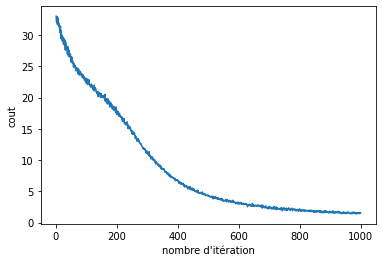

In [60]:
plt.figure()
plt.plot(range(1,n_iter+1),loss)
plt.xlabel("nombre d'itération")
plt.ylabel('cout')
plt.savefig("img_rapport/cout_mini_nolin")
plt.show()

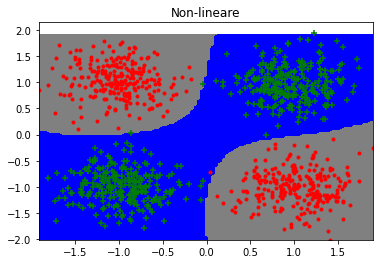

In [61]:
plt.figure()
plt.title('Non-lineare') 
plot_frontiere(datax,lambda x : predict(x),step=100)
plot_data(datax,datay.reshape(-1))
plt.savefig("img_rapport/mini_nolin")
plt.show()

In [58]:
yhat = predict(datax)
np.mean(yhat == datay)

0.997

In [70]:
uspsdatatrain = "data/USPS_train.txt"
uspsdatatest = "data/USPS_test.txt"
alltrainx,alltrainy = load_usps(uspsdatatrain)
alltestx,alltesty = load_usps(uspsdatatest)
alltrainy = OneHotEncoder(sparse = False).fit_transform(alltrainy.reshape(-1,1))


In [71]:
alltrainx = MinMaxScaler().fit_transform(alltrainx)
alltestx = MinMaxScaler().fit_transform(alltestx)

In [72]:
lin1 = Linear(256, 100)
lin2 = Linear(100, 10)

seq = Sequentiel(lin1,
                TanH(),
                lin2,
                TanH()
                )

n_iter = 1000
eps = 1e-4


sq, loss = mini_SGD(seq,alltrainx, alltrainy, batch_size=100, eps=eps, loss_fonction = Softmax_CELoss(), nb_iteration=n_iter)



iteration 0 loss = 239.0084519861732
iteration 20 loss = 204.01797556334603
iteration 40 loss = 190.20737405594005
iteration 60 loss = 183.3085040636445
iteration 80 loss = 182.74983844359951
iteration 100 loss = 177.90457868032078
iteration 120 loss = 174.55860535344902
iteration 140 loss = 173.10754061006963
iteration 160 loss = 176.65756680602556
iteration 180 loss = 180.5401516407184
iteration 200 loss = 182.68937690153987
iteration 220 loss = 181.76069622341848
iteration 240 loss = 181.54081947250828
iteration 260 loss = 185.01222917476593
iteration 280 loss = 177.7621268254417
iteration 300 loss = 181.65571181620643
iteration 320 loss = 181.36101195414054
iteration 340 loss = 176.72676746364226
iteration 360 loss = 180.05988999691044
iteration 380 loss = 178.76627607707763
iteration 400 loss = 178.30715668931205
iteration 420 loss = 175.00463576140046
iteration 440 loss = 177.65770158943525
iteration 460 loss = 178.02811378657742
iteration 480 loss = 178.73907762381822
iteration 

0.8490284005979073


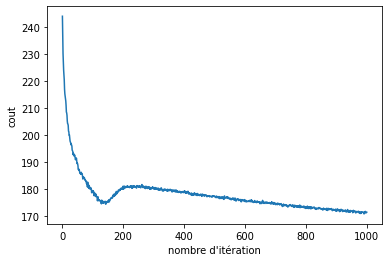

In [73]:
outputs = seq.forward(alltestx)
#yhat = Softmax().forward(outputs[-1])
yhat = np.argmax(outputs[-1], axis=1)

print(np.mean(yhat== alltesty))

plt.figure()
plt.xlabel("nombre d'itération")
plt.ylabel('cout')
plt.plot(range(1, n_iter+1),loss)
plt.savefig("img_rapport/cout_multiclass")
plt.show()

In [35]:
np.mean(yhat == alltesty)

0.8584952665670155

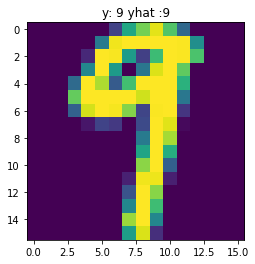

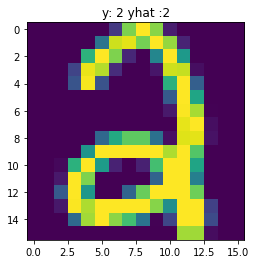

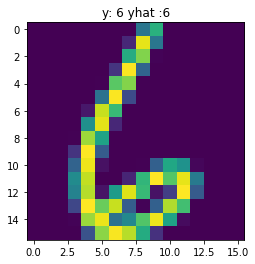

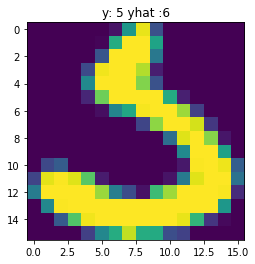

In [38]:
idx = np.random.choice(len(alltestx), 4)
k=1
for i in idx:
    plt.figure()
    plt.title('y: '+str(alltesty[i])+' yhat :'+str(yhat[i]))
    plt.imshow(alltestx[i].reshape(16,16))
    plt.savefig("img_rapport/multclass"+str(k))
    plt.show()
    k += 1